In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/2-Faza-Grace/refs/heads/master/Data/asia_df.csv')
df


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.5200,69.1800,Asia/Kabul,1715849100,2024-05-16 13:15:00,26.6,79.8,Partly Cloudy,...,8.400,26.600,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Armenia,Yerevan,40.1800,44.5100,Asia/Yerevan,1715849100,2024-05-16 12:45:00,19.0,66.2,Partly cloudy,...,0.800,0.900,1,1,05:45 AM,08:12 PM,01:17 PM,02:31 AM,Waxing Gibbous,55
2,Azerbaijan,Baku,40.4000,49.8800,Asia/Baku,1715849100,2024-05-16 12:45:00,17.0,62.6,Partly cloudy,...,1.900,2.200,1,1,05:23 AM,07:51 PM,12:54 PM,02:10 AM,Waxing Gibbous,55
3,Bahrain,Manama,26.2400,50.5800,Asia/Bahrain,1715849100,2024-05-16 11:45:00,36.0,96.8,Sunny,...,39.000,114.300,2,4,04:50 AM,06:18 PM,12:10 PM,12:45 AM,Waxing Gibbous,55
4,Bangladesh,Dhaka,23.7200,90.4100,Asia/Dhaka,1715849100,2024-05-16 14:45:00,38.4,101.2,Partly Cloudy,...,49.700,57.000,3,6,05:16 AM,06:34 PM,12:28 PM,12:58 AM,Waxing Gibbous,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13645,Turkmenistan,Ashgabat,37.9500,58.3833,Asia/Ashgabat,1740564000,2025-02-26 15:00:00,8.4,47.1,Sunny,...,26.270,37.555,2,3,07:43 AM,06:57 PM,06:53 AM,05:02 PM,Waning Crescent,7
13646,United Arab Emirates,Abu Dhabi,24.4667,54.3667,Asia/Dubai,1740564000,2025-02-26 14:00:00,21.1,70.0,Partly cloudy,...,28.490,43.475,2,3,06:47 AM,06:23 PM,05:39 AM,04:46 PM,Waning Crescent,6
13647,Uzbekistan,Tashkent,41.3167,69.2500,Asia/Tashkent,1740564000,2025-02-26 15:00:00,4.2,39.6,Partly cloudy,...,5.735,5.920,1,1,07:02 AM,06:10 PM,06:18 AM,04:08 PM,Waning Crescent,7
13648,Vietnam,Hanoi,21.0333,105.8500,Asia/Bangkok,1740564000,2025-02-26 17:00:00,17.2,63.0,Overcast,...,97.865,98.605,4,10,06:19 AM,06:00 PM,05:00 AM,04:17 PM,Waning Crescent,7


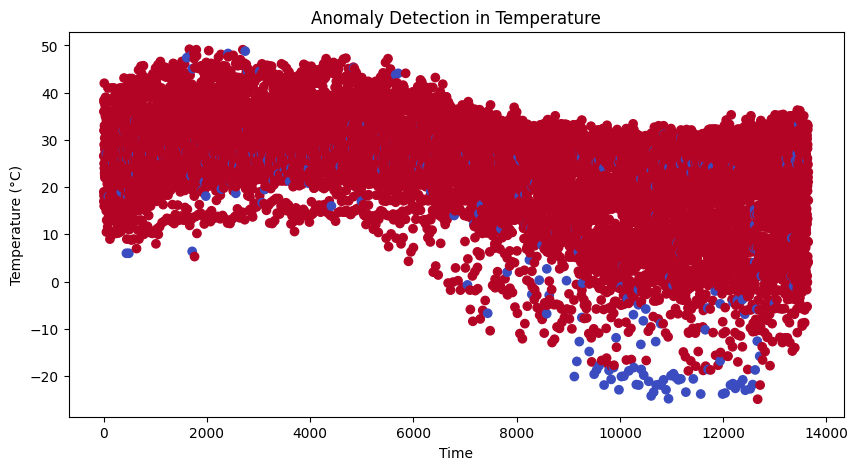

In [4]:
from sklearn.ensemble import IsolationForest

# Pilih fitur untuk anomali detection
features = ["temperature_celsius", "humidity", "wind_kph", "precip_mm"]
X = df[features].dropna()

# Buat model Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)  # 2% data dianggap anomali
df["anomaly"] = iso_forest.fit_predict(X)

# Visualisasi Anomali
plt.figure(figsize=(10,5))
plt.scatter(df.index, df["temperature_celsius"], c=df["anomaly"], cmap="coolwarm")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Anomaly Detection in Temperature")
plt.show()